In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier


In [3]:
df = pd.read_csv("milk_quality_data.csv")
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.isnull().sum()

,0
ph,0
temperature,0
taste,0
odor,0
fat,0
turbidity,0
colour,0
grade,0


In [5]:
df.shape

(1059, 8)

In [6]:
df['grade'] = df['grade'].map({'low': 0, 'medium': 1, 'high': 2})

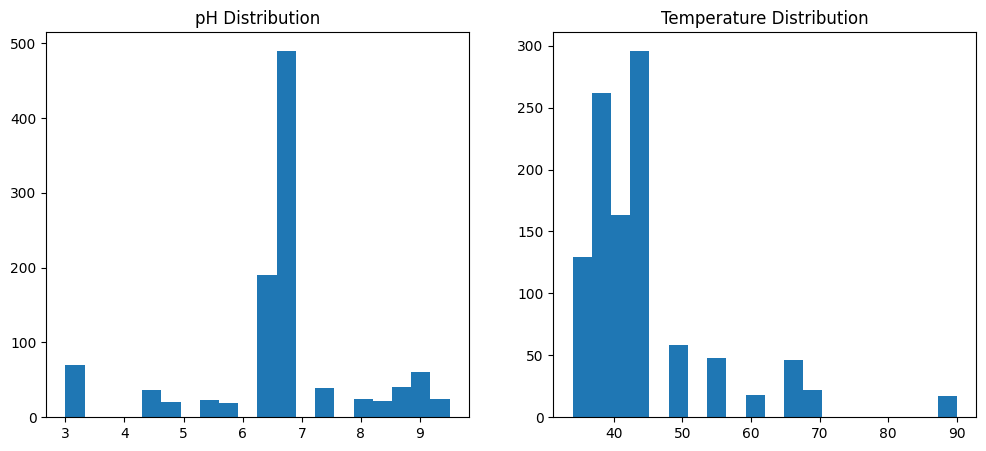

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['ph'], bins=20)
plt.title('pH Distribution')

plt.subplot(1,2,2)
plt.hist(df['temperature'], bins=20)
plt.title('Temperature Distribution')

plt.show()

In [8]:
X = df[['ph', 'temperature', 'taste', 'odor', 'fat', 'turbidity', 'colour']]
y = df['grade']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.7358490566037735


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 0.9937106918238994


In [13]:
gb = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb.fit(X_train, y_train)


gb_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


Gradient Boosting Accuracy: 0.9905660377358491


In [14]:
xgb = XGBClassifier(
    n_estimators=50,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


XGBoost Accuracy: 0.9968553459119497


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:56:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [15]:
xgb_tuned = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.5,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_tuned.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:56:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [16]:
tuned_pred = xgb_tuned.predict(X_test)
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, tuned_pred))


Tuned XGBoost Accuracy: 0.9968553459119497


In [18]:

print("Classification Report:")
print(classification_report(y_test, tuned_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, tuned_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      1.00      1.00        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

Confusion Matrix:
[[114   1   0]
 [  0 127   0]
 [  0   0  76]]


In [20]:
import joblib

# Save the trained model
joblib.dump(xgb_tuned, "milk_quality_model.pkl")

print("Model saved as milk_quality_model.pkl")


Model saved as milk_quality_model.pkl
